# импорт библиотек

In [1]:
import sympy as sp
import numpy as np
import pandas as pd
import math

In [2]:
X = np.arange(0.01, 0.051, 0.005) # заданный диапазон значений аргумента
sp.var('t')
z = (1 + sp.atan(16.7*t + 0.1))**(1/2)/ sp.cos(7*t + 0.3) # заданная функция

# Вспомогательные функции
Разложения в ряд Тейлора для акртангенса и косинуса

In [3]:
def arctanTaylor (x, eps):
    un=1
    arctg=0
    k=0
    if ((x<1) and (x>-1)):
        while (abs(un)>eps):
            un=(-1)**k*x**(2*k+1)/(2*k+1)
            arctg+=un
            k+=1
    else:
        arctg = pi/2*np.sign(x)
        while (abs(un)>eps):
            un=(-1)**k*x**(-2*k-1)/(2*k+1)
            arctg-=un
            k+=1
    return arctg

In [4]:
def cosTaylor (x, eps): # |x|<pi/4
    un=1
    cos=0
    k=0
    while (abs(un)>eps):
        un=(-1)**k*x**(2*k)/math.factorial(2*k)
        cos+=un
        k+=1
    return cos

Квадратный корень по формуле Герона

In [5]:
def sq_root(u, v, eps):
    w0=u**(1/2)+0.0001 #значение w0 - √u с избытком
    w=(w0+u/w0)/2
    while ((w-w0)/v>eps):
        w0=w
        w=(w0+u/w0)/2
    return w

Представим функцию в виде f=√u/v

In [6]:
def func(u, v, eps):
    return sq_root(u, v, eps)/v

# Вычисления

In [7]:
df=pd.DataFrame({'argument': [], 'approx func' : [], 'exact func': [], 'abs error': [], 'MAE':[], 'MSE':[], 'max_abserr':[]})
for x in X:
    f_appr=func(1+arctanTaylor(16.7*x+0.1, 10**(-6)/1.8), cosTaylor(7*x+0.3, 10**(-6)/6.6), 10**(-6)/3)
    f_exact=z.subs(t,x)
    abserr=abs(f_appr-f_exact)
    line={'argument': x, 'approx func': f_appr, 'exact func': f_exact, 'abs error': abserr}
    df=df.append(line, ignore_index=True)

считаем MAE, MSE, максимум абсолютной погрешности

(средняя абсолютная ошибка - сумма погрешностей, деленная на кол-во эл-тов

средняя квадратичная ошибка - сумма квадратов погрешностей, деленная на кол-во эл-тов)

In [8]:
df['MAE'].loc[0]= df['abs error'].sum()/X.size 
df['MSE'].loc[0]=np.sum(np.array(df['abs error'])**2)/X.size
df['max_abserr'].loc[0]=df['abs error'].max() 
print(df)

   argument  approx func        exact func            abs error  \
0     0.010     1.204410  1.20440967828296  3.54571638716550e-9   
1     0.015     1.258118  1.25811784829228  8.84847639603947e-9   
2     0.020     1.312195  1.31219496982491  1.15698632896510e-8   
3     0.025     1.366867  1.36686702434051  1.30074673254654e-8   
4     0.030     1.422447  1.42244656460288  3.69334933747467e-8   
5     0.035     1.479322  1.47932226022294  3.12595305196339e-8   
6     0.040     1.537950  1.53794995008043  8.59695399313409e-8   
7     0.045     1.598847  1.59884722096036  9.09656756586941e-8   
8     0.050     1.662593  1.66259257994680  1.24165851822511e-7   

                   MAE                   MSE           max_abserr  
0  4.51406238561387e-8  3.75753771844700e-15  1.24165851822511e-7  
1                  NaN                   NaN                  NaN  
2                  NaN                   NaN                  NaN  
3                  NaN                   NaN             

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


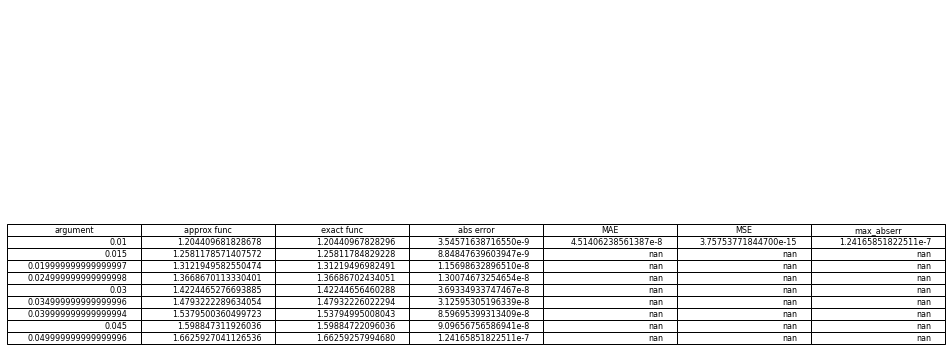

In [9]:
import matplotlib.pyplot as plt
ax = plt.subplot(1,1,1, frame_on=False)
plt.table(cellText=df.values,colWidths = [0.4]*len(df.columns), colLabels=df.columns)
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
plt.savefig('mytable.png')